# Performing Linear Regression

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')
# Importing necessary python libraries

In [2]:
df = pd.read_csv('Height-Weight Data.csv')
# Creaing Data Frame and reading the csv file

In [3]:
df.head()
# Reading the first 5 rows of the Data Frame

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [4]:
df.shape
# Checking the number of rows and columns of the file

(3501, 2)

Text(0.5, 1.0, 'Height-Weight Relationship')

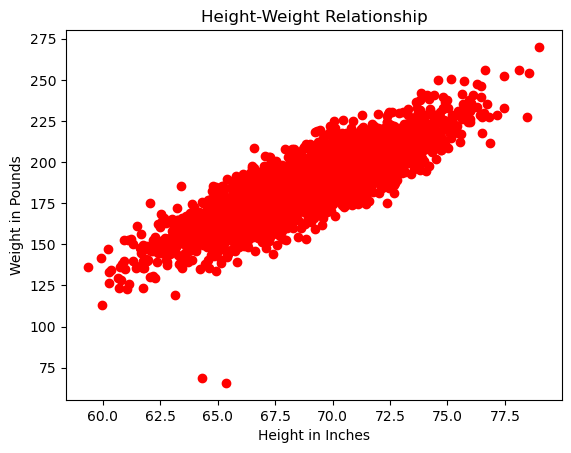

In [5]:
plt.scatter(df.Height, df.Weight, color='red') # ploting the data in the graph
plt.xlabel('Height in Inches') # Labeling x-axis
plt.ylabel('Weight in Pounds') # Labeling y-axis
plt.title('Height-Weight Relationship')

## Separating the values in the columns

In [6]:
x = df.drop('Weight', axis=1) # Separating the values of 'Height' column
y = df[['Weight']] # Separating the values of 'Weight' column

In [7]:
x.head() # Checking the first 5 rows of 'Height' column

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [8]:
y.head() # Checking the first 5 rows of 'Weight' column

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [9]:
x.shape # Checking the Dimension of 'Height' data

(3501, 1)

In [10]:
y.shape # Checking the Dimension of 'Weight' data

(3501, 1)

In [11]:
x.mean() # Determining the mean value of 'Height' data

Height    69.024411
dtype: float64

In [12]:
y.mean() # Determining the mean value of 'Weight' data

Weight    186.891258
dtype: float64

In [13]:
from sklearn.model_selection import train_test_split # Importing machine learning library

In [14]:
train, test = train_test_split(df, test_size = .25) # 25% data taken as test & 75% as train

In [15]:
train.shape # Checking the Dimension of 'train' data

(2625, 2)

In [16]:
test.shape # Checking the Dimension of 'test' data

(876, 2)

In [17]:
train.head() # Checking 5 rows of 'train' data

,Height,Weight
1034,72.161545,188.913332
3063,69.883451,181.674739
1316,69.044211,184.039981
1463,64.729616,161.952431
2489,69.798457,181.418074


In [18]:
test.head() # Checking 5 rows of 'test' data

,Height,Weight
1168,65.402875,159.605444
88,68.244462,174.109694
404,65.814943,166.583610
583,65.188478,151.886942
3301,69.940973,180.473458


## Separating the values of 'train' & 'test' data

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.25, random_state=0) # 25% data taken as 'test' and 75% taken as 'train'

In [20]:
xtrain.head() # Checking 5 rows of 'train' data in the 'Height' column

,Height
1310,67.847749
3153,65.215556
3333,63.873409
1002,69.156982
1765,68.503261


In [21]:
ytrain.head() # Checking 5 rows of 'train' data in the 'Weight' column

,Weight
1310,153.031321
3153,174.931143
3333,152.554620
1002,206.515190
1765,193.982059


In [22]:
xtest.head() # Checking 5 rows of 'test' data in the 'Height' column

,Height
1269,72.165757
118,67.738963
2810,71.359472
2621,68.074623
1535,66.854111


In [23]:
ytest.head() # Checking 5 rows of 'test' data in the 'Weight' column

,Weight
1269,204.577436
118,178.170556
2810,197.472656
2621,171.695510
1535,180.544377


## Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression # Importing LinearRegression library

In [25]:
lr = LinearRegression() # Creating variable

In [26]:
lr.fit(xtrain, ytrain) #Training the model

LinearRegression()

In [27]:
m = lr.coef_ # Determing the value of 'm' of the equation, y = mx + c
m

array([[5.96613032]])

In [28]:
c = lr.intercept_ # # Determing the value of 'c' of the equation, y = mx + c
c

array([-224.98706384])

In [29]:
yp = (m*72) + c # Calculation of y-prediction manually assuming x = 72
yp

array([[204.57431936]])

In [30]:
yp = (m*65) + c # Calculation of y-prediction manually assuming x = 65
yp

array([[162.81140711]])

In [31]:
lr.predict([[72]]) # # Calculation of y-prediction using 'Linear Regression' assuming x = 72

array([[204.57431936]])

In [32]:
lr.predict([[65]]) # Calculation of y-prediction using 'Linear Regression' assuming x = 65

array([[162.81140711]])

In [33]:
x.head() # Checking the first 5 rows of 'Height' column

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [34]:
y.head() # Checking the first 5 rows of 'Weight' column

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [35]:
df['predicted_weight'] = lr.predict(x) # Adding a new column in the data frame
df.head() #Checking first 5 rows

,Height,Weight,predicted_weight
0,73.847017,241.893563,215.593864
1,68.781904,162.310473,185.374740
2,74.110105,212.740856,217.163483
3,71.730978,220.042470,202.969301
4,69.881796,206.349801,191.936837


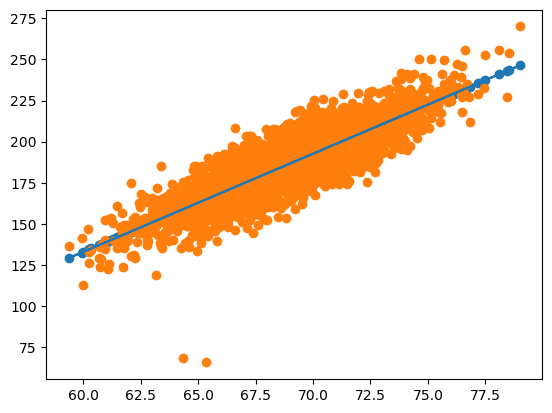

In [36]:
plt.plot(x, df[['predicted_weight']]) # ploting the predicted weight 
plt.scatter(x, df[['predicted_weight']]) # scatter ploting of the predicted weight
plt.scatter (x, df[['Weight']]) # scatter ploting of the actual weight data along with the predicted weight

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error # Importing the necessary libraries

In [38]:
mse = mean_squared_error(ytest, lr.predict(xtest)) # Declaring the variable for Mean Squared Error
mae = mean_absolute_error(ytest, lr.predict(xtest)) # Declaring the variable for Mean Absolute Error

In [39]:
mse 

103.70875574105973

In [40]:
mae

8.145588569833935

In [41]:
lr.score(xtest, ytest)

0.7400625947962998

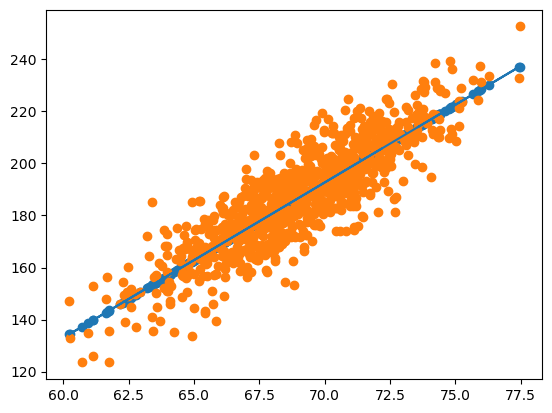

In [42]:
plt.plot(xtest, lr.predict(xtest)) # Ploting the predition of the testing data
plt.scatter(xtest, lr.predict(xtest)) # Scatter ploting the predition of the testing data
plt.scatter(xtest, ytest) # Scatter ploting of the actual testing data